In [1]:
import pandas as pd

## SERIES

In [2]:
ser = pd.Series(data=[100, 200, 300, 400, 500], index=['tom', 'bob', 'nancy', 'dan', 'eric'])
print(ser.index)
ser

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')


tom      100
bob      200
nancy    300
dan      400
eric     500
dtype: int64

In [3]:
ser = pd.Series(data=[100, 'foo', 300, 'bar', 500], index=['tom', 'bob', 'nancy', 'dan', 'eric'])
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [4]:
# Indice por nombre
print(ser['nancy'])

# Varios indices por numero
print(ser[[4,3,1]])

# por iloc
ser.iloc[2]

300
eric    500
dan     bar
bob     foo
dtype: object


300

In [5]:
# Verifying some data in series
'bob' in ser

True

In [6]:
# Operations
print(ser * 2)

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
dtype: object


In [7]:
print(ser[['tom','nancy','eric']] ** 2)

tom       10000
nancy     90000
eric     250000
dtype: object


## DATAFRAME

In [8]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

# Crear DF y llamar index y columnas
df = pd.DataFrame(d)
print(df.index)
print(df.columns)

df

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')
Index(['one', 'two'], dtype='object')


,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [9]:
pd.DataFrame(d, index=['dancy','ball','apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [10]:
pd.DataFrame(d, index=['dancy','ball','apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


## DATAFRAME FROM DICT

In [11]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [12]:
pd.DataFrame(data)

,alex,joe,ema,dora,alice
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [13]:
pd.DataFrame(data, index=['orange','red'])

,alex,joe,ema,dora,alice
orange,1.0,2.0,NaN,NaN,NaN
red,NaN,NaN,5.0,10.0,20.0


In [14]:
pd.DataFrame(data, columns=['joe','dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


## OPERACIONES

In [15]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [16]:
df['three'] = df.one * df.two
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [17]:
df['flag'] = df.one> 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [18]:
# Pop dropea una columna
three = df.pop('three')
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [19]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [20]:
# del es una funcion de delete para borrar columnas. Si no encuentra la columna, marca error
del df['two']
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [21]:
# Inserta una columna (posicion de la columna, nombre, datos de la columna)
df.insert(2, 'copy_of_one', df['one'])
df

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [22]:
# NOTA: Mandar solo los 2 primeros datos de la columna. Slicing para rellenar
df['obe_upper_half'] = df['one'][:2]
df

,one,flag,copy_of_one,obe_upper_half
apple,100.0,False,100.0,100.0
ball,200.0,False,200.0,200.0
cerill,NaN,False,NaN,NaN
clock,300.0,True,300.0,NaN
dancy,NaN,False,NaN,NaN


## IMPORTAR DATOS

### Comandos UNIX

In [23]:
%cd C:\Users\Tole 01\Desktop\Micromaster_Data_Science\Week-4-Pandas\movielens\ml-25m

C:\Users\Tole 01\Desktop\Micromaster_Data_Science\Week-4-Pandas\movielens\ml-25m


In [24]:
!ls -l

total 1129580
-rw-r--r-- 1 Tole 01 None     10460 Jan 18 13:15 README.txt
-rw-r--r-- 1 Tole 01 None 435164157 Jan 18 13:15 genome-scores.csv
-rw-r--r-- 1 Tole 01 None     18103 Jan 18 13:15 genome-tags.csv
-rw-r--r-- 1 Tole 01 None   1368578 Jan 18 13:15 links.csv
-rw-r--r-- 1 Tole 01 None   3038099 Jan 18 13:15 movies.csv
-rw-r--r-- 1 Tole 01 None 678260987 Jan 18 13:15 ratings.csv
-rw-r--r-- 1 Tole 01 None  38810332 Jan 18 13:15 tags.csv


In [25]:
!cat movies.csv | wc -l

62424


In [26]:
!head -5 movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [27]:
!head -5 ratings.csv

userId,movieId,rating,timestamp
1,296,5.0,1147880044
1,306,3.5,1147868817
1,307,5.0,1147868828
1,665,5.0,1147878820


### Importar Data

In [28]:
movies = pd.read_csv('movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
tags = pd.read_csv('tags.csv', sep=',')
tags.head(5)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [30]:
ratings = pd.read_csv('ratings.csv',parse_dates=['timestamp'])
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [31]:
# borrar las columnas timestamp
del tags['timestamp']
del ratings['timestamp']

## DATA STRUCTURES

### Series

In [32]:
row_0 = tags.iloc[0]
print(type(row_0))
print(f'''
{row_0.index}''')
row_0

<class 'pandas.core.series.Series'>

Index(['userId', 'movieId', 'tag'], dtype='object')


userId           3
movieId        260
tag        classic
Name: 0, dtype: object

In [33]:
row_0['userId']

3

In [34]:
'rating' in row_0

False

In [35]:
row_0.name

0

In [36]:
# Renombrar columnas
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

### Extraccion por iloc

In [37]:
# Extraer 3 filas distintas
tags.iloc[[0,11,2000]]

,userId,movieId,tag
0,3,260,classic
11,4,164909,cliche
2000,647,164179,twist ending


## FUNCIONES ESTADISTICAS

In [38]:
print(f''' FUNCION DESCRIBE
{ratings.rating.describe()}

MEAN
{ratings.rating.mean()}

MIN
{ratings.rating.min()}

MAX
{ratings.rating.max()}

STANDARD DEVIATION
{ratings.rating.std()}

MODA
{ratings.rating.mode()}
''')

 FUNCION DESCRIBE
count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

MEAN
3.533854451353085

MIN
0.5

MAX
5.0

STANDARD DEVIATION
1.0607439610179747

MODA
0    4.0
dtype: float64



### Mas funciones

In [39]:
# Funcion corr. Nos indica lo relacionadas que estan las variables 
#(1: muy relacionada , 0: nada relacionado)

ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.004413,0.001940
movieId,-0.004413,1.000000,-0.009216
rating,0.001940,-0.009216,1.000000


In [40]:
# Any. Te indica si hay un valor que cumpla la condicion (True) o no (False)
filter_1 = ratings.rating > 5
print(filter_1)
filter_1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
25000090    False
25000091    False
25000092    False
25000093    False
25000094    False
Name: rating, Length: 25000095, dtype: bool


False

In [41]:
# All. Te indica si hay un valor que cumpla la condicion (True) o no (False)
filter_2 = ratings.rating > 0
print(filter_2)
filter_2.all()

0           True
1           True
2           True
3           True
4           True
            ... 
25000090    True
25000091    True
25000092    True
25000093    True
25000094    True
Name: rating, Length: 25000095, dtype: bool


True

## DATA CLEANING

### Eliminar datos nulos

In [42]:
print(movies.shape)
movies

(62423, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [43]:
# Esta expresion te dice si hay algun dato que sea de tipo nulo en el DF movies
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [44]:
# Esta expresion te dice si hay algun dato que sea de tipo nulo en el DF ratings
print(ratings.shape)
ratings.isnull().any()

(25000095, 3)


userId     False
movieId    False
rating     False
dtype: bool

In [45]:
# Esta expresion te dice si hay algun dato que sea de tipo nulo en el DF ratings
print(tags.shape)
tags.isnull().any()

(1093360, 3)


userId     False
movieId    False
tag         True
dtype: bool

In [46]:
tags = tags.dropna()
print(tags.isnull().any())
print(tags.shape)
tags

userId     False
movieId    False
tag        False
dtype: bool
(1093344, 3)


,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good
...,...,...,...
1093355,162521,66934,Neil Patrick Harris
1093356,162521,103341,cornetto trilogy
1093357,162534,189169,comedy
1093358,162534,189169,disabled


### Visualizacion

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

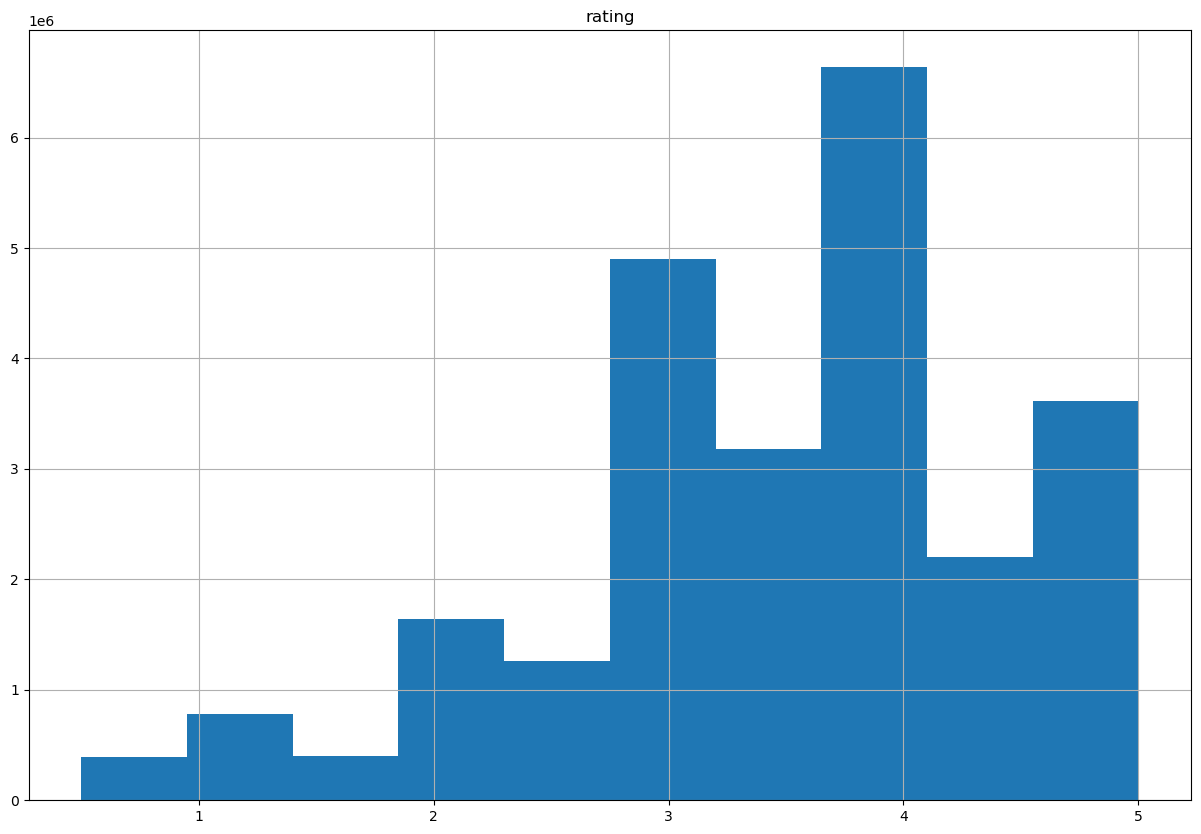

In [47]:
# inline sirve para que jupyter muestre las graficas en cada celda
%matplotlib inline

# Llamas al histograma
ratings.hist(column = 'rating', figsize = (15,10))

<AxesSubplot:>

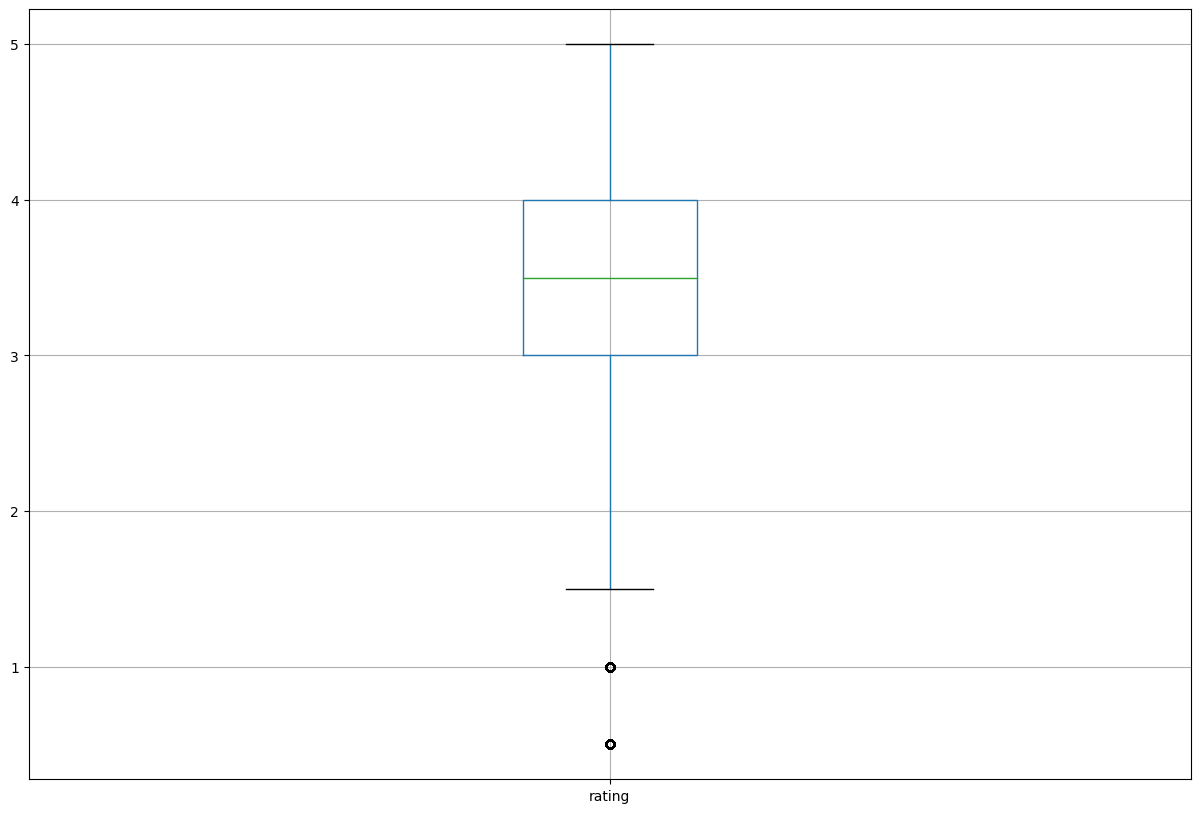

In [48]:
# Llamas a las  cajas para saber quartiles
ratings.boxplot(column = 'rating', figsize = (15,10))

### Slicing

In [49]:
# Obtienes el head de
tags.tag.head(5)

0             classic
1              sci-fi
2         dark comedy
3      great dialogue
4    so bad it's good
Name: tag, dtype: object

In [50]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [51]:
# Slicing de datos por numero de index
ratings[1000:1010]

,userId,movieId,rating
1000,4,45517,2.5
1001,4,45722,3.5
1002,4,46948,2.5
1003,4,46972,3.5
1004,4,48780,5.0
1005,4,48982,3.0
1006,4,49272,3.5
1007,4,49396,3.5
1008,4,49649,1.0
1009,4,50601,1.5


In [52]:
ratings[-10:]

,userId,movieId,rating
25000085,162541,8983,4.5
25000086,162541,31658,4.5
25000087,162541,33794,4.0
25000088,162541,41566,4.0
25000089,162541,45517,4.5
25000090,162541,50872,4.5
25000091,162541,55768,2.5
25000092,162541,56176,2.0
25000093,162541,58559,4.0
25000094,162541,63876,5.0


In [53]:
# value_counts es un contador de palabras definido por python
tag_counts = tags.tag.value_counts()
tag_counts[:10]

sci-fi                8330
atmospheric           6516
action                5907
comedy                5702
surreal               5326
based on a book       5079
twist ending          4820
funny                 4738
visually appealing    4526
dystopia              4257
Name: tag, dtype: int64

In [54]:
# Se puede hacer lo mismo para -10
tag_counts[-10:]

driving lessons                 1
actually filmed in Pittsburg    1
fake New York settings          1
haunted farm                    1
filmed in Budapest              1
teen sleuth                     1
evil twins                      1
paternity test                  1
QVC                             1
cornetto triolgy                1
Name: tag, dtype: int64

<AxesSubplot:>

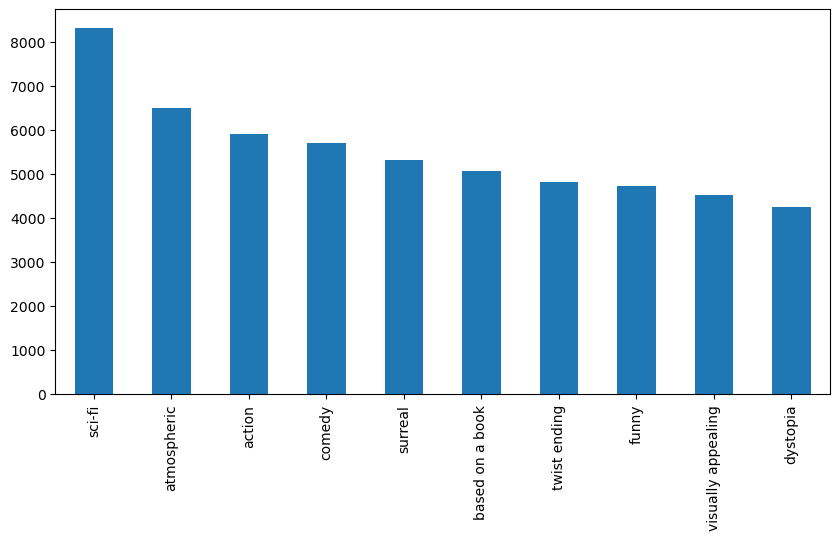

In [55]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))

### Filtrar

In [56]:
# filtras a traves de una condicion
is_highly_rated = ratings.rating >= 4.0
ratings[is_highly_rated][30:50]

,userId,movieId,rating
49,1,7365,4.0
54,1,7940,4.5
56,1,8154,5.0
57,1,8327,5.0
58,1,8360,4.0
62,1,8786,4.0
64,1,8973,4.0
66,1,27266,4.5
69,1,32591,5.0
72,2,110,5.0


In [57]:
# uso de contains para extraer datos especificos
is_animation = movies.genres.str.contains('Animation')
movies[is_animation][5:15]

,movieId,title,genres
309,313,"Swan Princess, The (1994)",Animation|Children
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
387,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
545,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
580,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
586,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
587,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
588,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
602,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [58]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
309,313,"Swan Princess, The (1994)",Animation|Children
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
387,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
545,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


### Groupby y Agregar

In [68]:
ratings_count = ratings[['rating','movieId']].groupby('rating').count().reset_index()
ratings_count

,rating,movieId
0,0.5,393068
1,1.0,776815
2,1.5,399490
3,2.0,1640868
4,2.5,1262797
5,3.0,4896928
6,3.5,3177318
7,4.0,6639798
8,4.5,2200539
9,5.0,3612474


In [60]:
average_rating = ratings[['rating','movieId']].groupby('movieId').mean()
average_rating.tail()

,rating
movieId,
209157,1.5
209159,3.0
209163,4.5
209169,3.0
209171,3.0


In [61]:
movie_count = ratings[['rating','movieId']].groupby('movieId').count()
movie_count

,rating
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714
...,...
209157,1
209159,1
209163,1


In [62]:
movie_count.tail()

,rating
movieId,
209157,1
209159,1
209163,1
209169,1
209171,1


## MERGE

In [63]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [64]:
tags.head()

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


In [67]:
# Merge une 2 DF. DF1.mmerge(DF2, on=columna a mergear, how= inner, outer, etc)
t = movies.merge(tags, on='movieId',how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,791,Owned
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1048,imdb top 250
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1361,Pixar
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,Pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,time travel


In [71]:
# as_index ignora el index anterior
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434


In [74]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
59042,209157,We (2018),Drama,1.5
59043,209159,Window of the Soul (2001),Documentary,3.0
59044,209163,Bad Poems (2018),Comedy|Drama,4.5
59045,209169,A Girl Thing (2001),(no genres listed),3.0
59046,209171,Women of Devil's Island (1962),Action|Adventure|Drama,3.0


In [75]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
59027,209121,Adrenalin: The BMW Touring Car Story (2014),Documentary,4.0
59028,209123,Square Roots: The Story of SpongeBob SquarePan...,Documentary,4.0
59029,209129,Destination Titan (2011),Documentary,4.5
59041,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.0
59044,209163,Bad Poems (2018),Comedy|Drama,4.5


In [79]:
# Contains busca una cierta palabra
is_comedy = box_office['genres'].str.contains('Comedy')
box_office[is_comedy][-5:]

,movieId,title,genres,rating
59026,209119,Up to the World (2014),Comedy|Drama,3.5
59035,209141,And They Lived Happily Ever After (1976),Comedy,1.0
59040,209153,Happy Flight (2008),Comedy|Drama,2.5
59041,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.0
59044,209163,Bad Poems (2018),Comedy|Drama,4.5


In [80]:
box_office[is_comedy & is_highly_rated]

,movieId,title,genres,rating
229,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,4.027936
292,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912
351,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011
600,608,Fargo (1996),Comedy|Crime|Drama|Thriller,4.111421
705,720,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy,4.103381
...,...,...,...,...
58990,208911,Cheating in Chains (2006),Comedy,4.000000
58998,208939,Klaus (2019),Adventure|Animation|Children|Comedy,4.312500
59001,208945,Powder (2019),Comedy|Drama,4.500000
59041,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.000000


## STRING OPERATIONS

In [81]:
# split separa los datos de acuerdo a un separador, creando un nuevo nuevo arreglo
movies_genres = movies['genres'].str.split('|', expand=True)
movies_genres.head()

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


In [82]:
# contains devuelve true o false para filtrar
movies_genres['isComedy'] = movies['genres'].str.contains('Comedy')
movies_genres

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
...,...,...,...,...,...,...,...,...,...,...,...
62418,Drama,None,None,None,None,None,None,None,None,None,False
62419,Documentary,None,None,None,None,None,None,None,None,None,False
62420,Comedy,Drama,None,None,None,None,None,None,None,None,True
62421,(no genres listed),None,None,None,None,None,None,None,None,None,False


In [88]:
movies['year'] = movies['title'].str.extract('(\d{4})') 
movies.tail()

,movieId,title,genres,year
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962


## CONVERSION DE TIEMPO 

In [89]:
tags

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good
...,...,...,...
1093355,162521,66934,Neil Patrick Harris
1093356,162521,103341,cornetto trilogy
1093357,162534,189169,comedy
1093358,162534,189169,disabled


In [91]:
tags = pd.read_csv('tags.csv', sep=',')
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [93]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [95]:
# to_datetime permite contar el tiempo a partir de 1/enero/1970
tags['parsed_time'] = pd.to_datetime(tags.timestamp, unit='s')
tags

,userId,movieId,tag,timestamp,parsed_time
0,3,260,classic,1439472355,2015-08-13 13:25:55
1,3,260,sci-fi,1439472256,2015-08-13 13:24:16
2,4,1732,dark comedy,1573943598,2019-11-16 22:33:18
3,4,1732,great dialogue,1573943604,2019-11-16 22:33:24
4,4,7569,so bad it's good,1573943455,2019-11-16 22:30:55
...,...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611,2015-03-25 19:26:51
1093356,162521,103341,cornetto trilogy,1427311259,2015-03-25 19:20:59
1093357,162534,189169,comedy,1527518175,2018-05-28 14:36:15
1093358,162534,189169,disabled,1527518181,2018-05-28 14:36:21


In [97]:
# Ahora tiene un tipo de dato M8[ns]
tags.parsed_time.dtypes

dtype('<M8[ns]')

In [99]:
# filtro de tiempo en str
greater_than_t = tags.parsed_time > '2015-02-01'

# Nuevo DF filtrado
selected_rows = tags[greater_than_t]

# imprime las shapes
tags.shape, selected_rows.shape

((1093360, 5), (692112, 5))

### Demostrar correlaciones

In [102]:
selected_rows.sort_values('parsed_time', ascending= False)[:10]

#tags['parsed_time'] = tags.parsed_time.apply(lambda x: str(x))
#tags['year'] = tags.parsed_time.str.extract('(\d{4})')
#tags

,userId,movieId,tag,timestamp,parsed_time
874210,123527,201594,villain,1574316696,2019-11-21 06:11:36
874201,123527,201594,country life,1574316682,2019-11-21 06:11:22
874203,123527,201594,farmhouse,1574316680,2019-11-21 06:11:20
874202,123527,201594,farm,1574316678,2019-11-21 06:11:18
874206,123527,201594,kansas,1574316676,2019-11-21 06:11:16
874209,123527,201594,thriller,1574316667,2019-11-21 06:11:07
874207,123527,201594,sci-fi,1574316666,2019-11-21 06:11:06
874205,123527,201594,horror,1574316664,2019-11-21 06:11:04
874204,123527,201594,gore,1574316613,2019-11-21 06:10:13
874208,123527,201594,supernatural,1574316603,2019-11-21 06:10:03


In [109]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
59042,209157,1.5
59043,209159,3.0
59044,209163,4.5
59045,209169,3.0
59046,209171,3.0


In [121]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()

# Intentamos ver si esta correlacionado, pero el valor es muy bajo para decir que haya relacion entre la pelicula y el rating
joined.corr()

,movieId,rating
movieId,1.000000,-0.093459
rating,-0.093459,1.000000


In [122]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1000,2.935729
1,1001,3.034314
2,1013,0.500000
3,1037,4.050000
4,1066,2.000000
5,1080,3.923913
6,1119,2.900000
7,1138,3.128569
8,1200,3.437500
9,1210,2.750000


In [118]:
yearly_average.corr()

,rating
rating,1.0


<AxesSubplot:xlabel='year'>

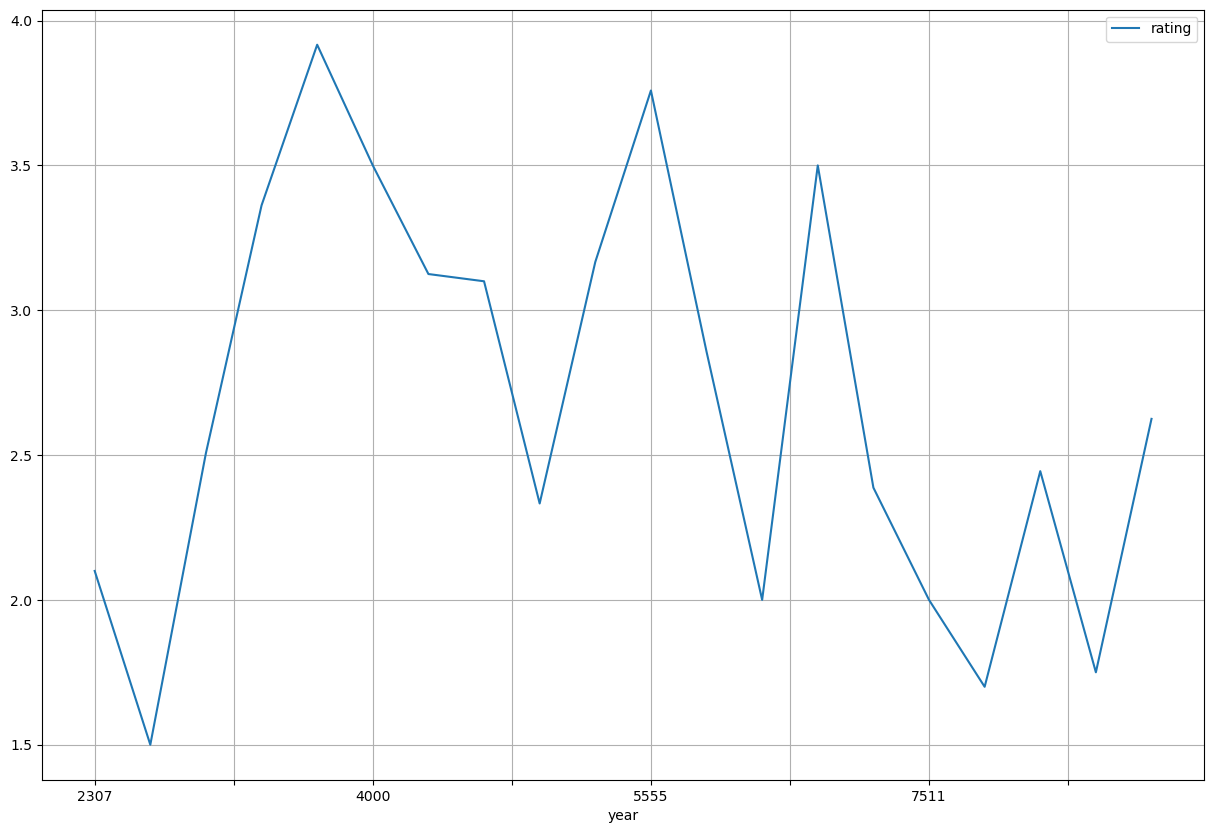

In [119]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)